<a href="https://colab.research.google.com/github/Nazmul92/Machine-Learning-and-Federated-Learning/blob/main/CNN_implementation_Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.layers import LayerNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical


In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={"figure.dpi":120})

In [ ]:
import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(f"Training data size is {X_train.shape}\nTesting data size is {X_test.shape}")

Training data size is (60000, 28, 28)
Testing data size is (10000, 28, 28)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) 

X_train shape: (60000, 28, 28)


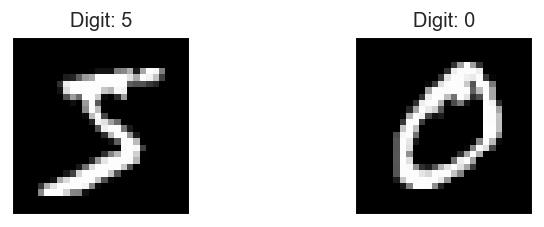

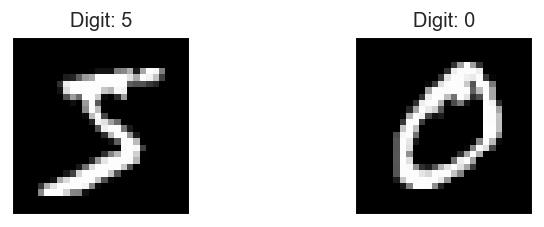

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(2):
  plt.subplot(2,2,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_category)
y_test = keras.utils.np_utils.to_categorical(y_test, num_category)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
epochs = 50
batch_size = 64

In [ ]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(LayerNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(LayerNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 12, 12, 64)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)        

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

In [ ]:
history = model.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)

Epoch 1/50


2022-03-06 14:41:01.261196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


936/937 [============================>.] - ETA: 0s - loss: 0.3975 - accuracy: 0.8700

2022-03-06 14:41:25.602248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


937/937 [==============================] - 26s 27ms/step - loss: 0.3971 - accuracy: 0.8702 - val_loss: 0.0625 - val_accuracy: 0.9826
Epoch 2/50
937/937 [==============================] - 25s 27ms/step - loss: 0.0542 - accuracy: 0.9834 - val_loss: 0.0394 - val_accuracy: 0.9871
Epoch 3/50
937/937 [==============================] - 25s 27ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0347 - val_accuracy: 0.9889
Epoch 4/50
937/937 [==============================] - 25s 27ms/step - loss: 0.0383 - accuracy: 0.9887 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 5/50
937/937 [==============================] - 25s 27ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch 6/50
937/937 [==============================] - 25s 27ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 7/50
937/937 [==============================] - 26s 27ms/step - loss: 0.0290 - accuracy: 0.9913 - val_loss: 0.0291 - val_accuracy: 0.9913
Epo

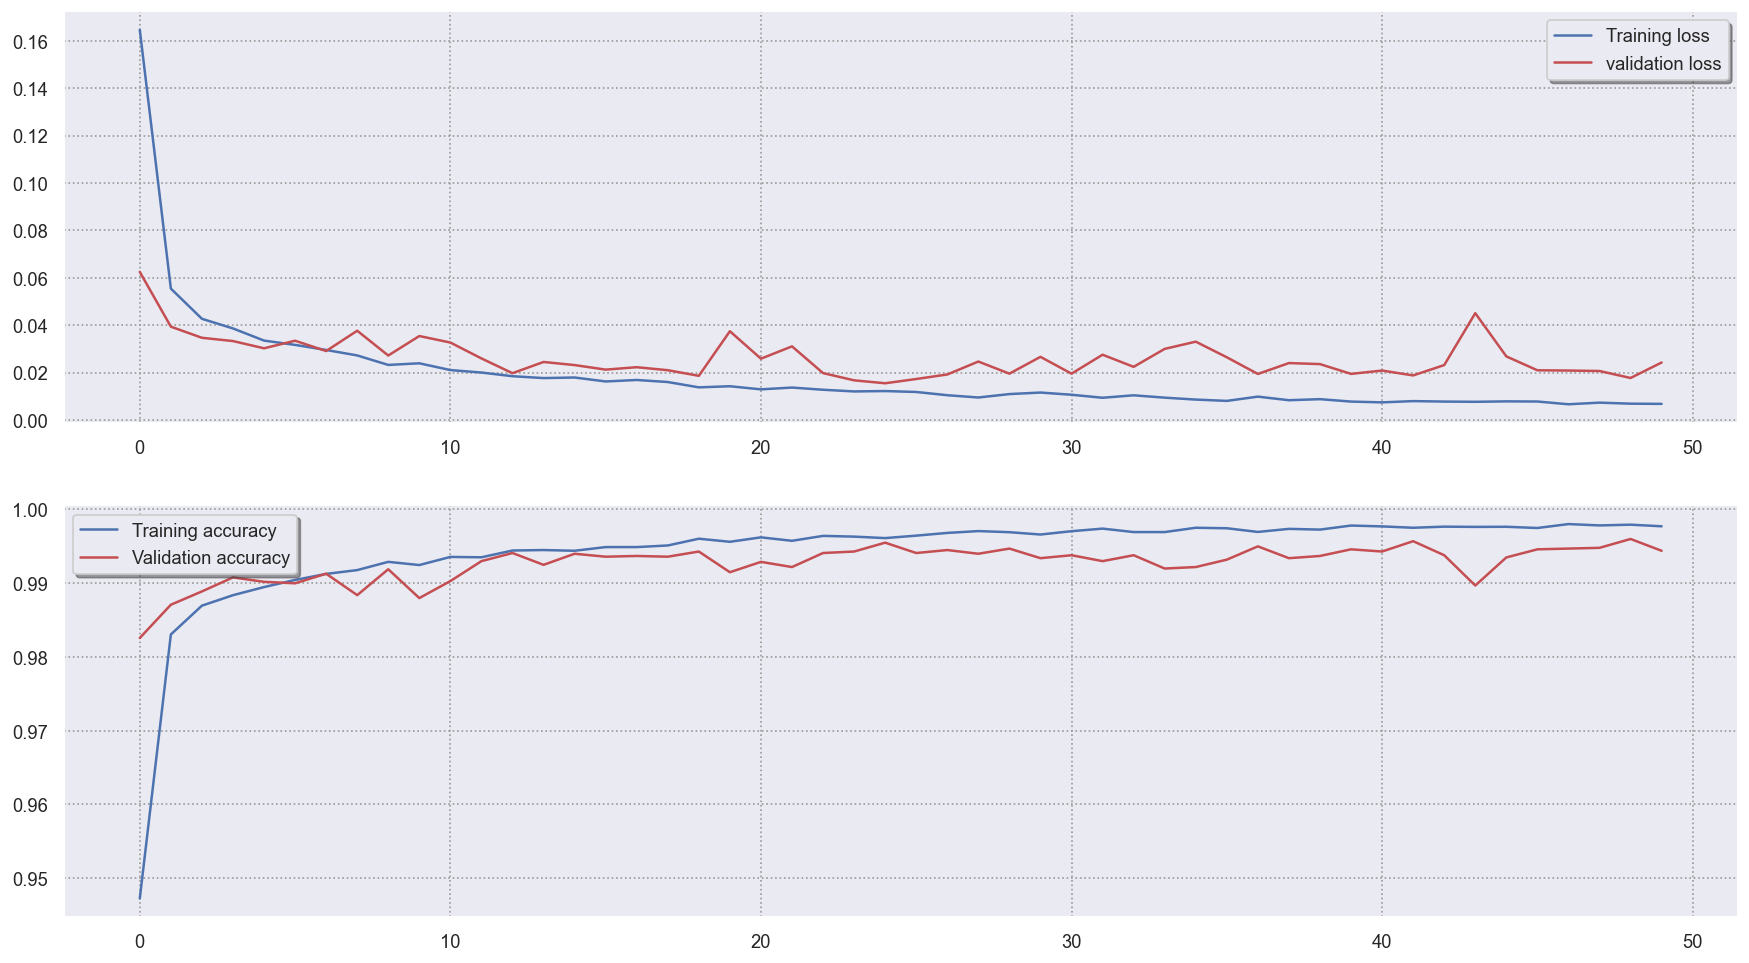

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

(0.0, 1.0)

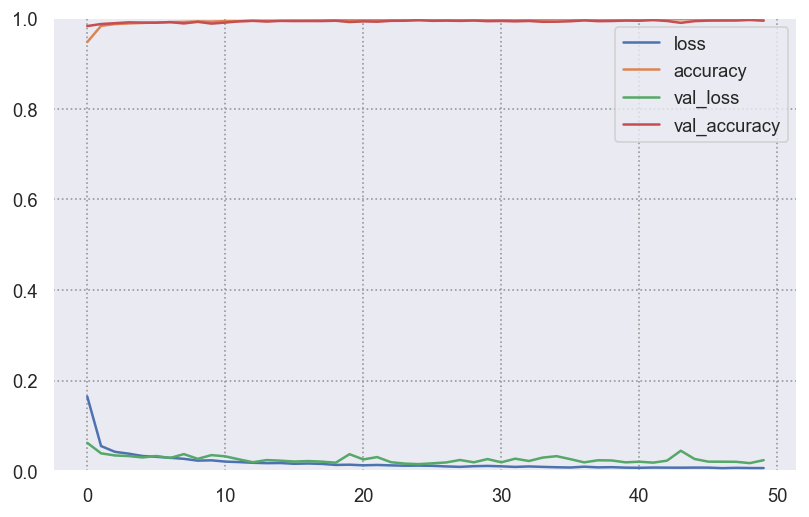

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 937}

In [ ]:
history.history

{'loss': [0.16458632051944733,
  0.055447474122047424,
  0.042712435126304626,
  0.03864333778619766,
  0.03352097049355507,
  0.03169632703065872,
  0.02956041321158409,
  0.027252379804849625,
  0.023249423131346703,
  0.02393699251115322,
  0.021078351885080338,
  0.020036574453115463,
  0.01849205233156681,
  0.017694121226668358,
  0.01794607937335968,
  0.016270393505692482,
  0.016899356618523598,
  0.016033515334129333,
  0.013788074254989624,
  0.014258291572332382,
  0.012942079454660416,
  0.013700303621590137,
  0.012777361087501049,
  0.012064648792147636,
  0.012223985977470875,
  0.011836400255560875,
  0.010473571717739105,
  0.0095067098736763,
  0.010951118543744087,
  0.011593980714678764,
  0.010668536648154259,
  0.009397318586707115,
  0.01043300423771143,
  0.009443051181733608,
  0.00863045547157526,
  0.008073301985859871,
  0.009871215559542179,
  0.00835810974240303,
  0.008809028193354607,
  0.007785160560160875,
  0.007453517988324165,
  0.00798850413411855

In [ ]:
y_pred = model.predict_classes(X_test)

/Users/r4ngon/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2022-03-06 15:05:29.408008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)
cm = confusion_matrix(y_test_arg, y_pred)

<AxesSubplot:>

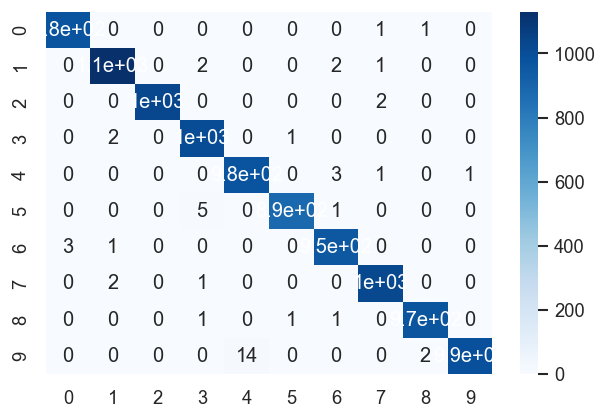

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
print(len(model.layers))

14


In [ ]:
report = metrics.classification_report(y_test_arg, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      1.00       892
           6       0.99      1.00      0.99       958
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.98      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

